# Sales Prediction

#### 1. Importing modules

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### 2. Importing & analyzing dataset

In [21]:
sales = pd.read_csv('Advertising.csv')
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
# removing unecessary columns
sales=sales.drop(columns = ['Unnamed: 0'])
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
# dataset dimensions
sales.shape

(200, 4)

In [24]:
# information of dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
# checking for null values
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [26]:
# stats of data
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### 3. Graphs & Charts 

<AxesSubplot:>

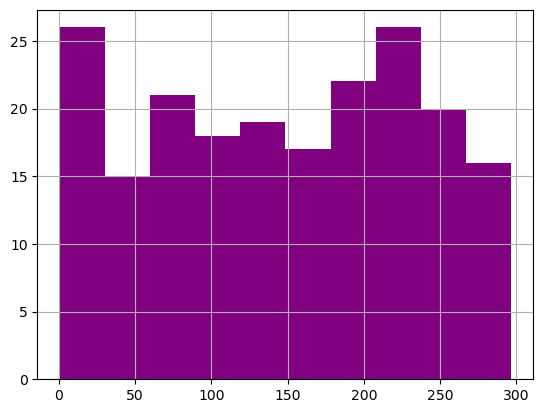

In [27]:
# TV
sales['TV'].hist(color='Purple')

<AxesSubplot:>

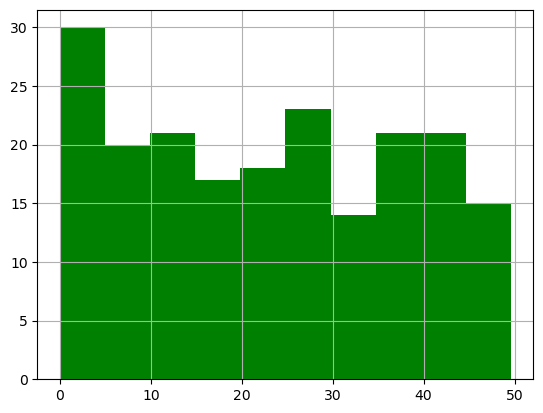

In [28]:
# TV
sales['Radio'].hist(color='Green')

<AxesSubplot:>

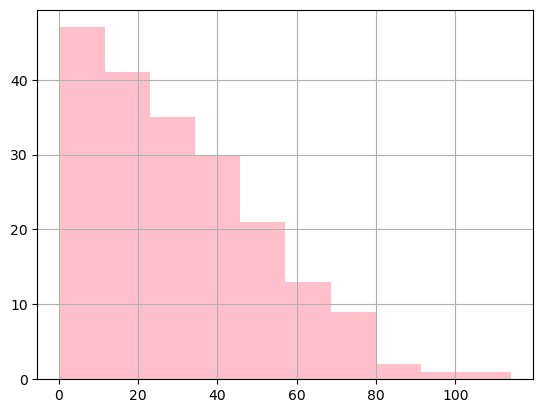

In [29]:
# Newspaper
sales['Newspaper'].hist(color='Pink')

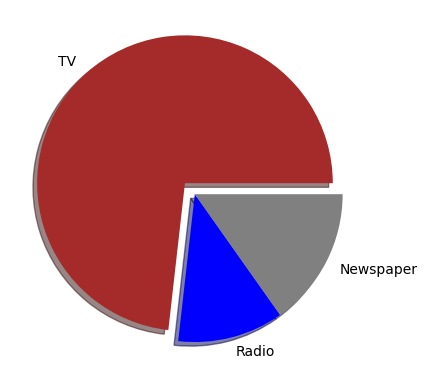

In [30]:
# Pie chart
tv=sum(sales['TV'])
radio=sum(sales['Radio'])
newspaper = sum(sales['Newspaper'])
sale = np.array([tv,radio,newspaper])
lab=['TV','Radio','Newspaper']
myexplode=[0.1,0,0]
col=['Brown','Blue','Grey']
plt.pie(sale, labels= lab,explode= myexplode,shadow=True,colors=col)
plt.show()

#### 4. Correlation

In [31]:
sales.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

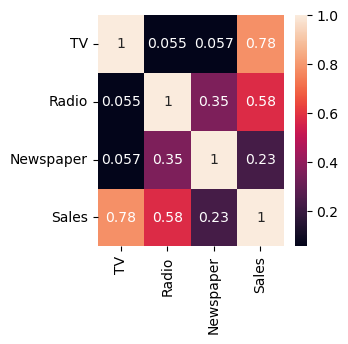

In [32]:
# mapping correlation
corr=sales.corr()
fig, ax= plt.subplots(figsize=(3,3))
sns.heatmap(corr, annot=True, ax=ax)

#### 5. Model Training

In [33]:
X= sales.drop(columns=['Sales'])
Y=sales['Sales']
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=3)

In [34]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 3)
(160, 3)
(40, 3)
(200,)
(160,)
(40,)


In [35]:
# Regression model
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred= reg.predict(X_train)

In [36]:
print("Accuracy",reg.score(X_train,Y_train)*100)

Accuracy 89.30288385772916


In [37]:
# Regression model
reg = LinearRegression()
reg.fit(X_test,Y_test)
Y_pred= reg.predict(X_test)

In [38]:
print("Accuracy",reg.score(X_test,Y_test)*100)

Accuracy 92.3377968735242
